# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [15]:
tips = tips[tips['tip_pct']<.5]

In [16]:
reg1 = smf.ols("tip ~ net_bill", data=tips).fit()
reg1.params

Intercept    1.221901
net_bill     0.104373
dtype: float64

<Axes: xlabel='net_bill', ylabel='tip'>

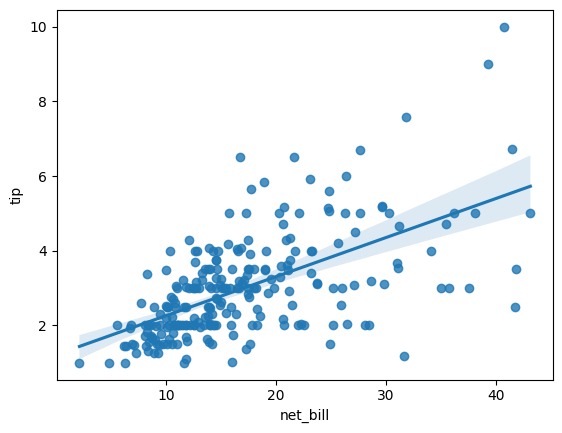

In [17]:
sns.regplot(tips, x='net_bill', y='tip')

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [18]:
reg2 = smf.ols("tip_pct ~ net_bill", data=tips).fit()
reg2.params

Intercept    0.253815
net_bill    -0.003735
dtype: float64

<Axes: xlabel='net_bill', ylabel='tip_pct'>

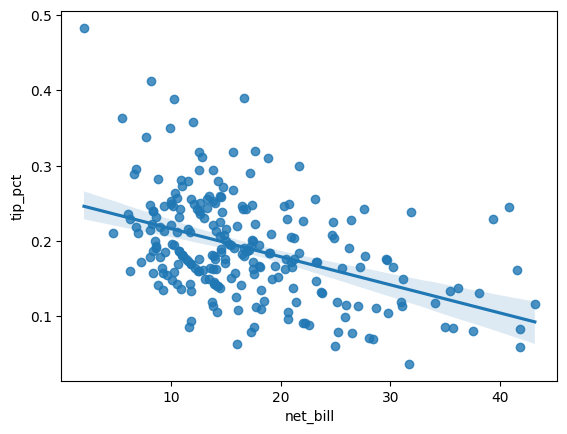

In [19]:
sns.regplot(tips, x='net_bill', y='tip_pct')

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

**Comentário:** Os gráficos demonstram tendências bem diferentes. A relação entre o valor da conta e o valor da gorjeta é positiva. No entanto a relação do valor da conta com o percentual da gorjeta, a relação é negativa.
A comparação dos R² se encontra na célula abaixo:

In [20]:
print(f"O valor de R² para o modelo que utiliza 'tip' como variável explicativa é de {reg1.rsquared}")
print(f"O valor de R² para o modelo que utiliza 'tip_pct' como variável explicativa é de {reg2.rsquared}")

O valor de R² para o modelo que utiliza 'tip' como variável explicativa é de 0.3635272583333453
O valor de R² para o modelo que utiliza 'tip_pct' como variável explicativa é de 0.18946394629203056


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [23]:
pred = reg2.fittedvalues

In [31]:
tip = tips["net_bill"] * pred

In [47]:
numerador = ((tips['tip'] - tip)**2).sum()
denominador = ((tips['tip'] - tips['tip'].mean())**2).sum()
r_quadrado = (1 - numerador/denominador)
print(f"O R² do modelo 'tip' é {r_quadrado}")
print(f"O R² do modelo do item 1 é {reg1.rsquared}")

O R² do modelo 'tip' é 0.3503553432251352
O R² do modelo do item 1 é 0.3635272583333453
